## **Name: Rohan Shrestha**
## **Uni Id: 2418112**



# **3.1 Warming Up Exercises - Basic Inspection and Exploration:**

# **Problem 1 - Data Read, Write and Inspect:**
Complete all following Task:

• Dataset for the Task: "bank.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify following:

(a) columns with dtypes=object

(b) unique values of those columns.

(c) check for the total number of null values in each column.

3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”
4. Read ”banknumericdata.csv” and Find the summary statistics.

In [7]:
import pandas as pd

# 1. Load the dataset
df = pd.read_csv("/content/drive/MyDrive/College Materials/Datasets Python/bank .csv")

# 2. Check info of the DataFrame and identify:
# (a) Columns with dtypes=object
object_columns = df.select_dtypes(include='object').columns
print("Columns with dtype=object:", object_columns)

# (b) Unique values of those columns
for col in object_columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())

# (c) Check for the total number of null values in each column
print("Null values in each column:")
print(df.isnull().sum())

# 3. Drop all the columns with dtypes=object and store in new DataFrame
df_numeric = df.drop(columns=object_columns)

# Save the DataFrame as 'banknumericdata.csv'
df_numeric.to_csv('banknumericdata.csv', index=False)

# 4. Read 'banknumericdata.csv' and find the summary statistics
df_numeric = pd.read_csv('banknumericdata.csv')
print(df_numeric.describe())  # Summary statistics


Columns with dtype=object: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
Unique values in column 'job':
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in column 'marital':
['married' 'single' 'divorced']
Unique values in column 'education':
['tertiary' 'secondary' 'unknown' 'primary']
Unique values in column 'default':
['no' 'yes']
Unique values in column 'housing':
['yes' 'no']
Unique values in column 'loan':
['no' 'yes']
Unique values in column 'contact':
['unknown' 'cellular' 'telephone']
Unique values in column 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in column 'poutcome':
['unknown' 'failure' 'other' 'success']
Unique values in column 'y':
['no' 'yes']
Null values in each column:
age          0
job          0
marital      0

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Problem 2 - Data Imputations:**
Complete all the following Task:

• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify column with missing (null) values.
3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.
4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [8]:
import pandas as pd

# 1. Load the dataset and import it into a pandas DataFrame
df_medical = pd.read_csv("/content/drive/MyDrive/College Materials/Datasets Python/medical_students_dataset.csv")

# 2. Check info of the DataFrame and identify columns with missing (null) values
print("Dataset Information:")
print(df_medical.info())

# Identify columns with missing values
missing_values = df_medical.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# 3. Handle missing values by filling them with appropriate techniques
# For each column, choose the imputation method based on the data type and distribution

for col in df_medical.columns:
    if df_medical[col].dtype == 'object':  # Categorical columns
        # Fill missing values with the most frequent value (mode)
        df_medical[col] = df_medical[col].fillna(df_medical[col].mode()[0])
    else:  # Numerical columns
        # If numerical, we will use the mean for imputation
        df_medical[col] = df_medical[col].fillna(df_medical[col].mean())

# Explanation:
# - Categorical columns: Using the most frequent value (mode) is common as it reflects the most typical category.
# - Numerical columns: Using the mean is a standard approach unless there are outliers, in which case, median could be better.

# 4. Check for duplicate values and manage them
duplicates = df_medical.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Remove duplicates if any
df_medical.drop_duplicates(inplace=True)

# Verify if duplicates were removed
print(f"\nNumber of duplicate rows after removal: {df_medical.duplicated().sum()}")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None

Missing values in each column:
Student ID        20000
Age               20000
Gender            20000
Height          

# **3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:**

# **Dataset Used: "titanic.csv"**

## **Problem - 1:**

Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’. Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean, median, maximum value, and minimum value of the ’Fare’ column?

In [9]:
import pandas as pd

df_titanic = pd.read_csv('/content/drive/MyDrive/College Materials/Datasets Python/Titanic-Dataset.csv')

df_first_class = df_titanic[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

df_first_class = df_first_class[df_first_class['Pclass'] == 1]

mean_fare = df_first_class['Fare'].mean()
median_fare = df_first_class['Fare'].median()
max_fare = df_first_class['Fare'].max()
min_fare = df_first_class['Fare'].min()

print(f"Mean Fare: {mean_fare}")
print(f"Median Fare: {median_fare}")
print(f"Max Fare: {max_fare}")
print(f"Min Fare: {min_fare}")


Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Max Fare: 512.3292
Min Fare: 0.0


## **Problem - 2:**

How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found this out, drop them from your DataFrame.

In [10]:
df_first_class = df_titanic[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

df_first_class = df_first_class[df_first_class['Pclass'] == 1]

missing_age = df_first_class['Age'].isnull().sum()
print(f"Number of missing values in 'Age' column: {missing_age}")

df_first_class_cleaned = df_first_class.dropna(subset=['Age'])

missing_age_after_drop = df_first_class_cleaned['Age'].isnull().sum()
print(f"Number of missing values in 'Age' column after dropping: {missing_age_after_drop}")


Number of missing values in 'Age' column: 30
Number of missing values in 'Age' column after dropping: 0


## **Problem - 3:**

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• ’C’ for Cherbourg

• ’Q’ for Queenstown

• ’S’ for Southampton

Task:

1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [11]:
df_first_class = df_titanic[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived', 'Embarked']]

df_first_class = df_first_class[df_first_class['Pclass'] == 1]

df_encoded = pd.get_dummies(df_first_class, columns=['Embarked'], prefix='Embarked')

df_encoded.head()


,Name,Pclass,Sex,Age,Fare,Survived,Embarked_C,Embarked_Q,Embarked_S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1,True,False,False
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1,False,False,True
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0,False,False,True
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1,False,False,True
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1,False,False,True


### **Problem - 4:**


Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

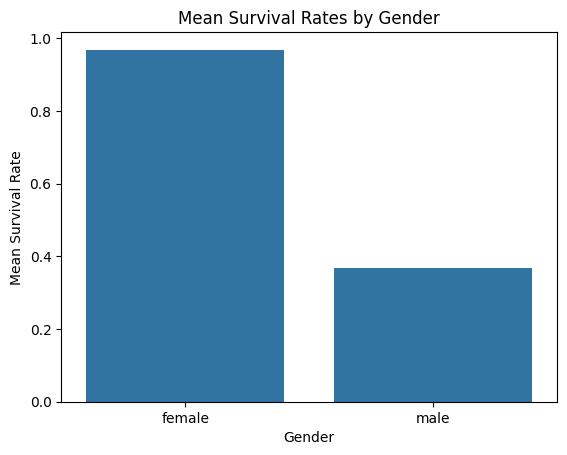

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

df_first_class = df_titanic[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

df_first_class = df_first_class[df_first_class['Pclass'] == 1]

survival_by_gender = df_first_class.groupby('Sex')['Survived'].mean()

sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values)
plt.title('Mean Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Survival Rate')
plt.show()


### **Problem - 5:**

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

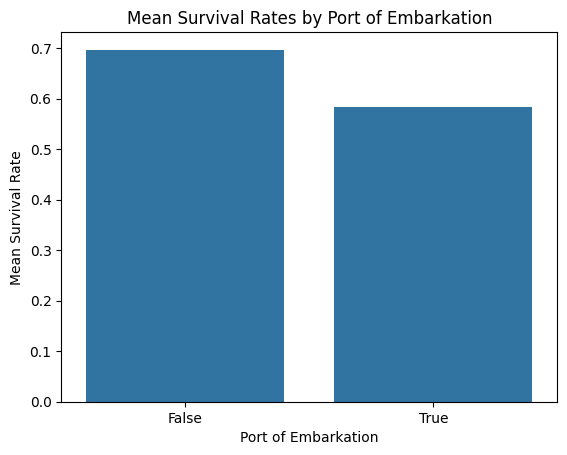

In [13]:
df_first_class = df_titanic[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived', 'Embarked']]

df_first_class = df_first_class[df_first_class['Pclass'] == 1]

df_encoded = pd.get_dummies(df_first_class, columns=['Embarked'], prefix='Embarked')

survival_by_embarked = df_encoded.groupby('Embarked_S')['Survived'].mean()

sns.barplot(x=survival_by_embarked.index, y=survival_by_embarked.values)
plt.title('Mean Survival Rates by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Mean Survival Rate')
plt.show()


### **Problem - 6{Optional}:**

Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
and age group. Draw a visualization using a any plotting library to represent this graphically.

<ipython-input-14-c0a2139fa5d1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_class['Age_Group'] = pd.qcut(df_first_class['Age'], 5)
<ipython-input-14-c0a2139fa5d1>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_class = df_first_class.groupby(['Pclass', 'Age_Group'])['Survived'].mean().reset_index()


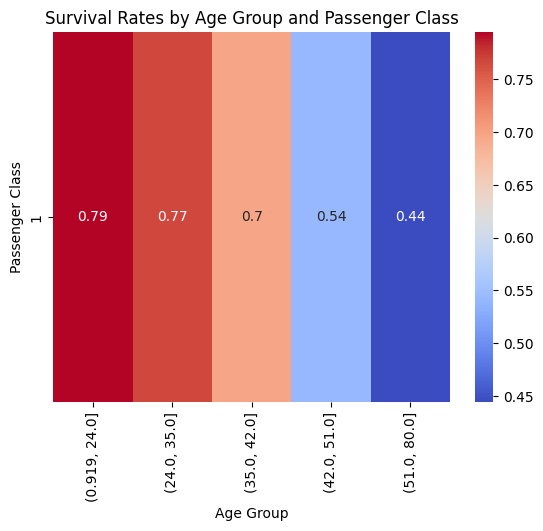

In [14]:
df_first_class = df_titanic[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

df_first_class = df_first_class[df_first_class['Pclass'] == 1]

df_first_class['Age_Group'] = pd.qcut(df_first_class['Age'], 5)

survival_by_age_class = df_first_class.groupby(['Pclass', 'Age_Group'])['Survived'].mean().reset_index()

pivoted_data = survival_by_age_class.pivot(index='Pclass', columns='Age_Group', values='Survived')

sns.heatmap(pivoted_data, annot=True, cmap='coolwarm')
plt.title('Survival Rates by Age Group and Passenger Class')
plt.xlabel('Age Group')
plt.ylabel('Passenger Class')
plt.show()
